In [1]:
from sklearn import svm, metrics
import glob, os.path, re, json

C:\ProgramData\Anaconda3\envs\collect\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname,'r',encoding='utf-8') as f:
        text = f.read()
    text = text.lower()
    cnt = [0 for n in range(0,26)]
    code_a = ord('a')
    code_z = ord('z')
    
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:
            cnt[n - code_a] += 1
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    return (freq, lang)

In [10]:
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {'freqs':freqs, 'labels':labels}
data = load_files('./lang/train/*.txt')
test = load_files('./lang/test/*.txt')

In [14]:
with open('./lang/freq.json', 'w', encoding='utf-8') as fp:
    json.dump([data, test], fp)

In [15]:
clf = svm.SVC()
clf.fit(data['freqs'], data['labels'])
predict = clf.predict(test['freqs'])

In [16]:
ac_score = metrics.accuracy_score(test['labels'], predict)
cl_report = metrics.classification_report(test['labels'], predict)
print(f'정답률 = {ac_score}')
print('리포트')
print(cl_report)

정답률 = 1.0
리포트
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# 시각화

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import json

C:\ProgramData\Anaconda3\envs\collect\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [27]:
with open('./lang/freq.json', 'r', encoding='utf-8') as fp:
    freq = json.load(fp)
lang_dic = {}
for i, lbl in enumerate(freq[0]['labels']):
    fq = freq[0]['freqs'][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

In [28]:
asclist = [[chr(n) for n in range(97, 97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)

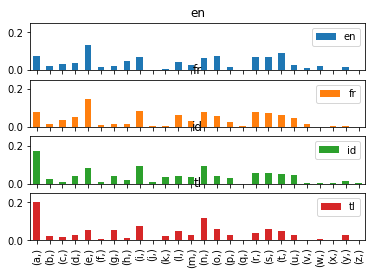

In [46]:
df.plot(kind='bar',subplots=True, ylim=(0,0.25))
plt.savefig('lang-plot.png')

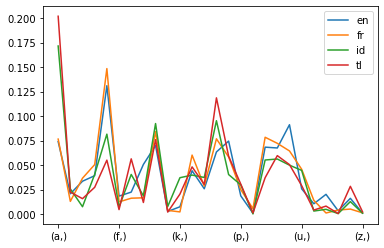

In [32]:
df.plot(kind='line')

In [42]:
with open('./lang/freq.json', 'r', encoding='utf-8') as fp:
    b = 10

In [43]:
print(b)

10


# web

In [47]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn import svm
import joblib

In [61]:
# 각 언어의 출현 빈도 데이터(JSON) 읽어 들이기
with open("./lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]
# 데이터 학습하기
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])
# 학습 데이터 저장하기
# 학습한 모델을 저장할 수 있는 Sklearn의 joblib
# https://minwook-shin.github.io/python-disk-caching-parallel-computing-using-joblib/
joblib.dump(clf, "./lang/freq.pkl")
print("ok")

ok
